In [1]:
# Import packages
import os
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#from matrix2latex import matrix2latex
from mpctools.extensions.mplext import plot_matrix
from mpctools.extensions.skext import multi_way_split
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_mutual_info_score, accuracy_score, f1_score, mean_squared_error, r2_score
from sklearn.model_selection import StratifiedKFold, ShuffleSplit
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
%matplotlib inline

In [ ]:
x = np.array([[]])

# Question 1

In [2]:
data_path1 = os.path.join(os.getcwd(), 'Data/PartA', '20ng_train.csv')
data_path2 = os.path.join(os.getcwd(), 'Data/PartA', '20ng_test.csv')
data_path3 = os.path.join(os.getcwd(), 'Data/PartA', '20ng_labels.csv')
news_train = pd.read_csv(data_path1, delimiter = ',', compression='bz2')
news_test = pd.read_csv(data_path2, delimiter = ',', compression='bz2')
news_labels = pd.read_csv(data_path3, delimiter = ',', compression='bz2')
X_train, y_train, X_test, y_test = news_train.drop('class', axis=1), news_train['class'], news_test.drop('class', axis=1), news_test['class']

In [26]:
news_test.describe()

,__,ability,able,ac,accept,access,according,account,act,action,...,worth,wouldn,write,written,wrong,wrote,year,years,yes,class
count,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,...,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000
mean,0.002292,0.002168,0.007335,0.002817,0.002701,0.004449,0.003012,0.001716,0.001886,0.001745,...,0.003018,0.005356,0.003746,0.003812,0.007960,0.001970,0.006214,0.008706,0.009449,3.345194
std,0.032391,0.021397,0.034312,0.032169,0.021777,0.032393,0.026133,0.022855,0.019504,0.018376,...,0.026231,0.033441,0.028779,0.032836,0.039182,0.020613,0.037389,0.041551,0.043570,2.208286
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000
max,0.864159,0.469412,0.337561,0.620254,0.310053,0.504324,0.420903,0.632166,0.336667,0.387412,...,0.490894,0.481298,0.434553,0.543384,0.470697,0.566179,0.537827,0.532047,0.590114,7.000000


In [27]:
max(news_test.drop('class', axis=1).describe().loc['mean'])

0.02561071134030815

In [28]:
news_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5648 entries, 0 to 5647
Columns: 1001 entries, __ to class
dtypes: float64(1000), int64(1)
memory usage: 43.1 MB


In [29]:
np.concatenate(news_labels.values, axis=0)

array(['comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'rec.autos',
       'rec.motorcycles', 'sci.crypt', 'sci.electronics',
       'soc.religion.christian', 'talk.religion.misc'], dtype=object)

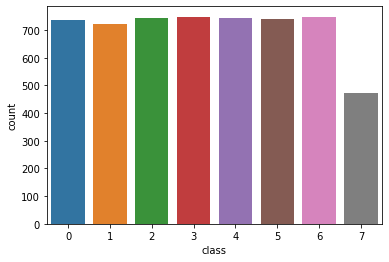

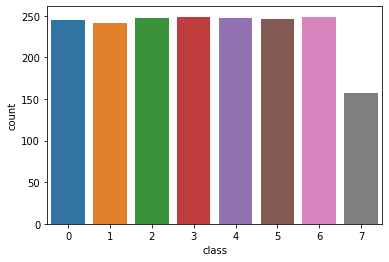

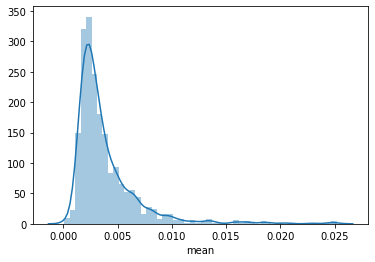

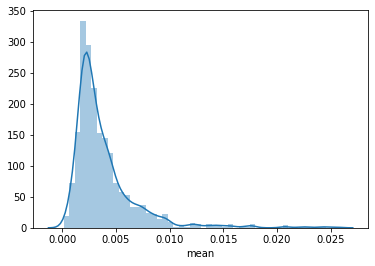

6    748
3    747
4    743
2    742
5    738
0    737
1    722
7    471
Name: class, dtype: int64
6    249
3    249
4    248
2    248
5    246
0    245
1    241
7    157
Name: class, dtype: int64
(5648,)
(1883,)


In [30]:
sns.countplot(x='class', data=news_train)
plt.show()
sns.countplot(x='class', data=news_test)
plt.show()
sns.distplot(X_train.describe().loc['mean'])
plt.show()
sns.distplot(X_test.describe().loc['mean'])
plt.show()
print(y_train.value_counts())
print(y_test.value_counts())
print(y_train.shape)
print(y_test.shape)

### 1.1
The training set consists of 5648 observations, each with a dimensionality of 1000. Each attribute of an observation corresponds to a word, and its value is the TF-IDF weight of that word, which ranges from 0 to 1 in this particular data set. The average values of each attribute range from 0.0001 to 0.0252. The most common attribute value is 0 as not all words appear in a document at once. There is an uneven class distribution as class 7 is almost half as frequent as all of the other classes, this will impact our model classification accuracy as words that belong to class 7 might be misclassified. The distribution of the mean value of each attribute resembles a positively skewed normal distribution with mean roughly around 0.0025.

### 1.2
The testing set consists of 1883 observations with a similar attribute value range to the training set. The class distribution also closely resembles the training set where class 1 to 6 have similar frequencies while class 7 is almost half as frequent as the other classes. The distribution of the mean value of each attribute also resembles the distribution observed on the training set, this supports the assumption for machine learning where the training and testing sets should be sampled from the same distribution, thus lowering the amount of bias from the testing set.

### 1.3
The desired model should take into account how relevant each word is to each document, that is, the words which would most help a human better understand a document without reading it all. Relevant words do not necessarily mean the most frequent words, for example, stopwords which are frequent while not offering much meaning. Thus it is important to not only consider the document but the dataset as a whole, as we want to distinguish words that are meaningful to a particular document and not words that appear the most, which TF-IDF tries to measure.

# Question 2

### 2.1
The non-deterministic nature of the K-Means algorithm comes from its random selection of starting centroids, this means that depending on the choice of the starting centroids the algorithm could give rise to entirely different models of the data. The SKLearn implementation of K-Means selects the final model based on which one minimizes Inertia the most.

### 2.2
The observations in the data set each belong to 1 of 8 different classes. This could imply that the observations from each class have similar values in the feature space, thus a reasonable number for this data set could be the number of classes: 8.

### 2.3
Mutual information, $\mathrm{MI}$, of known variables $U$ and $V$ can be calculated as $\mathrm{MI}(U,V)=\mathrm{H}(U)-\mathrm{H}(U|V)$, where $\mathrm{H}(X)$ is the entropy of variable $X$. Mutual information measures how much one variable tells us about the other, thus it is the reduction in uncertainty about variable $X$ after having observed variable $Y$. Mutual Information is applicable to this problem as we are trying to measure how much information is shared, and therefore the accuracy, between predicted labels and the ground truth of the data regardless of the ordering of the clusters produced by the algorithm. In practice it is difficult to use as it requires for the true labels of the data to be known, which might not be available in practice or requires them to be manually assigned.

In [5]:
AMIS = []
for i in np.arange(2,13):
    kM = KMeans(n_clusters=i, random_state=1000, n_init=50)
    kM.fit(X_train)
    AMI = adjusted_mutual_info_score(y_train, kM.predict(X_train), average_method='max')
    AMIS.append(AMI)
AMIS

[0.09833132888683942,
 0.19754027411318142,
 0.2564638316247759,
 0.2440905472039343,
 0.27950160086669634,
 0.3006931187647016,
 0.3275775886318796,
 0.33434188812656024,
 0.3052821758304732,
 0.3045520448835263,
 0.2976031041980303]

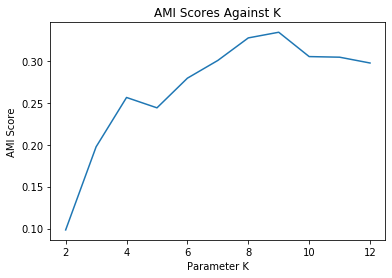

In [87]:
plt.plot(np.arange(2,13), [0.09833132888683942,
 0.19754027411318142,
 0.2564638316247759,
 0.2440905472039343,
 0.27950160086669634,
 0.3006931187647016,
 0.3275775886318796,
 0.33434188812656024,
 0.3052821758304732,
 0.3045520448835263,
 0.2976031041980303])
plt.xlabel('Parameter K')
plt.ylabel('AMI Score')
plt.title('AMI Scores Against K')
plt.show()

### 2.5
The $\mathrm{AMI}$ seems to grow larger as $K$ increases up to a point. Contrary to what is expected the highest $\mathrm{AMI}$ is not observed when $K=8$ (the number of classes), but instead from $K=9$, which could indicate that the data set is best modeled by 9 different classes. The $\mathrm{AMI}$ starts trending down for $K>9$. There also seems to be an unexpected decrease in $\mathrm{AMI}$ from $K=4$ to $K=5$.

In [15]:
kM = KMeans(n_clusters=4, random_state=1000, n_init=50)
kM.fit(X_train)
X_predict = kM.predict(X_train)

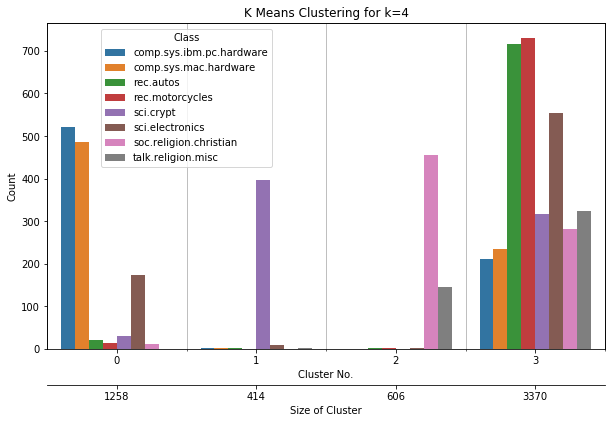

In [37]:
fig, ax = plt.subplots(figsize=(10,6))
ax = sns.countplot(x=X_predict, hue=y_train, ax=ax)
ax.legend(labels=np.concatenate(news_labels.values, axis=0), #  mixture class does not appear
          loc='center', bbox_to_anchor=[0.25, 0.77], title='Class')
plt.gca().set_xticks([i + 0.5 for i in range(4)], minor=True)
plt.grid(True, which='minor')
plt.xlabel('Cluster No.')
plt.ylabel('Count')
plt.title('K Means Clustering for k=4')

ax2 = ax.twiny()
ax2.set_xticks(range(4))
ax2.set_xticklabels(np.bincount(kM.labels_))
ax2.xaxis.set_ticks_position('bottom')
ax2.xaxis.set_label_position('bottom')
ax2.spines['bottom'].set_position(('outward',36))
ax2.set_xlim(ax.get_xlim())
ax2.set_xlabel('Size of Cluster')
plt.show()

In [27]:
np.bincount(kM.labels_)

array([1258,  414,  606, 3370], dtype=int64)

### 2.7
The clustering for $K=4$ is not very accurate as all observations belonging to a particular true class label are not all in 1 cluster. Most observations belonging to a class seem to be mostly spread out over two different clusters with the exception of $rec.motorcycles$ and $rec.autos$ which are mostly assigned to a single cluster. The cluster sizes are also very uneven with the smallest clusters only containing 1 or 2 classes on the majority, while the largest cluster has almost 6 times the samples as the smallest cluster and also contains significant amounts of samples from all classes. The result is mostly expected as the $\mathrm{AMI}$ score for $K=4$ indicates that the data is not well modelled by 4 clusters as observed in the previous questions.

# Question 3

### 3.1
The $\mathrm{F1}$ Score is the weighted average of the precision and recall of a model. It takes into account both false positives and false negatives, as well as taking into account class imbalance, which is the case for this data set, thus it is prefered over accuracy. The macro-average extends the score to handle multiple classes by calculating the metrics for each label and then finding their unweighted mean as per the SKlearn documentation for the function $\mathrm{f1\_score}$.

In [3]:
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)

In [4]:
dominant_class = y_train.value_counts().idxmax()
print('Class with highest prior probability: {}'.format(dominant_class))
print("F1 score on testing set: {:.3f}".format(f1_score(y_test, np.full_like(y_test, dominant_class), average="macro")))

Class with highest prior probability: 6
F1 score on testing set: 0.029


C:\Users\DAVID\Anaconda3\envs\iaml\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


### 3.2
The baseline classifier used will be one that classifies all test samples as the class that occured most often in the training set, $i.e$ the class with the highest prior probability. This is a useful baseline as it allows us to compare it to more complex models. The $\mathrm{F1}$ Score of this model on the test set is: $0.029$.

### 3.3
To extend Logistic Regression for multi-class problems, first a weight vector $w_k$ is created for each class, then the $\mathrm{softmax}$ function is used to calculate the probability that a feature vector belongs to a class, $P(y=k|x)$, thus assigning each feature vector to a class. The model is then optimized to minimize the log loss, in this case the $\mathrm{L}$-$\mathrm{BFGS}$ algorithm will be used as the optimization method.

In [5]:
lr = LogisticRegression(solver="lbfgs", multi_class="multinomial", random_state=0)

In [9]:
f1_scores = []
for train_index, test_index in skf.split(X_train, y_train):
    XVal_train, yVal_train, XVal_test, yVal_test = X_train.iloc[train_index], y_train.iloc[train_index], X_train.iloc[test_index], y_train.iloc[test_index]
    lr.fit(XVal_train, yVal_train)
    f1 = f1_score(yVal_test, lr.predict(XVal_test), average="macro")
    f1_scores.append(f1)
f1_scores

[0.6577444525394786,
 0.6746667410935314,
 0.6841787998742919,
 0.6925705429490217,
 0.6524624879755397,
 0.6764660784594521,
 0.6767801333123878,
 0.6784824626111753,
 0.665313662051848,
 0.6312439013978786]

In [10]:
print("Average of validation set F1 scores: {:.3f}".format(np.mean(f1_scores)))
print("Standard Deviation of validation set F1 scores: {:.3f}".format(np.std(f1_scores)))

Average of validation set F1 scores: 0.669
Standard Deviation of validation set F1 scores: 0.017


### 3.4
The average of the $\mathrm{F1}$ Scores calculated from the 10 folds of the training set is: $0.669$, while the standard deviation of the $\mathrm{F1}$ Scores is: $0.017$. The logistic regression model trained on each fold has a significantly higher average $\mathrm{F1}$ Score than the baseline classifier, while having a decently high average $\mathrm{F1}$ Score itself. The $\mathrm{F1}$ Scores calculated also have a low standard deviation indicating that the trained model is precise.

In [9]:
np.logspace(-4,5, num=19)

array([1.00000000e-04, 3.16227766e-04, 1.00000000e-03, 3.16227766e-03,
       1.00000000e-02, 3.16227766e-02, 1.00000000e-01, 3.16227766e-01,
       1.00000000e+00, 3.16227766e+00, 1.00000000e+01, 3.16227766e+01,
       1.00000000e+02, 3.16227766e+02, 1.00000000e+03, 3.16227766e+03,
       1.00000000e+04, 3.16227766e+04, 1.00000000e+05])

In [28]:
C = np.logspace(-4,5, num=19)

f1_avgt = []
f1_avgv = []
for i in np.arange(19):
    lr = LogisticRegression(solver="lbfgs", multi_class="multinomial", random_state=0, C=C[i])
    f1_train = []
    f1_val = []
    
    for train_index, test_index in skf.split(X_train, y_train):
        XVal_train, yVal_train, XVal_test, yVal_test = X_train.iloc[train_index], y_train.iloc[train_index], X_train.iloc[test_index], y_train.iloc[test_index]
        lr.fit(XVal_train, yVal_train)
        f1_t = f1_score(yVal_train, lr.predict(XVal_train), average="macro")
        f1_train.append(f1_t)
        f1_v = f1_score(yVal_test, lr.predict(XVal_test), average="macro")
        f1_val.append(f1_v)

    f1_avgt.append(np.mean(f1_train))
    f1_avgv.append(np.mean(f1_val))
    print("For C = {}\nAverage of train : {}\nAverage of test : {}\n".format(C[i], f1_avgt[i], f1_avgv[i]))

C:\Users\DAVID\Anaconda3\envs\iaml\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\DAVID\Anaconda3\envs\iaml\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\DAVID\Anaconda3\envs\iaml\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\DAVID\Anaconda3\envs\iaml\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\DAVID\Anaco

For C = 0.0001
Average of train : 0.1072384782041148
Average of test : 0.10426652383342358



C:\Users\DAVID\Anaconda3\envs\iaml\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\DAVID\Anaconda3\envs\iaml\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\DAVID\Anaconda3\envs\iaml\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\DAVID\Anaconda3\envs\iaml\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\DAVID\Anaco

For C = 0.00031622776601683794
Average of train : 0.21485270763655584
Average of test : 0.20693715644729807



C:\Users\DAVID\Anaconda3\envs\iaml\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\DAVID\Anaconda3\envs\iaml\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\DAVID\Anaconda3\envs\iaml\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\DAVID\Anaconda3\envs\iaml\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\DAVID\Anaco

For C = 0.001
Average of train : 0.4184069235211976
Average of test : 0.3978221586555387



C:\Users\DAVID\Anaconda3\envs\iaml\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\DAVID\Anaconda3\envs\iaml\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\DAVID\Anaconda3\envs\iaml\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\DAVID\Anaconda3\envs\iaml\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\DAVID\Anaco

For C = 0.0031622776601683794
Average of train : 0.5835871117895345
Average of test : 0.549401889558099



C:\Users\DAVID\Anaconda3\envs\iaml\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\DAVID\Anaconda3\envs\iaml\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\DAVID\Anaconda3\envs\iaml\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\DAVID\Anaconda3\envs\iaml\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\DAVID\Anaco

For C = 0.01
Average of train : 0.6286982582391885
Average of test : 0.5903162727489074



C:\Users\DAVID\Anaconda3\envs\iaml\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\DAVID\Anaconda3\envs\iaml\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\DAVID\Anaconda3\envs\iaml\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\DAVID\Anaconda3\envs\iaml\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\DAVID\Anaco

For C = 0.03162277660168379
Average of train : 0.6414261892791014
Average of test : 0.6007943890141922

For C = 0.1
Average of train : 0.6846299833794127
Average of test : 0.6231661213731127

For C = 0.31622776601683794
Average of train : 0.7587493540377247
Average of test : 0.6632928459845525

For C = 1.0
Average of train : 0.8169961852556071
Average of test : 0.6689909262264606



C:\Users\DAVID\Anaconda3\envs\iaml\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\DAVID\Anaconda3\envs\iaml\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\DAVID\Anaconda3\envs\iaml\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\DAVID\Anaconda3\envs\iaml\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\DAVID\Anaconda3\envs\iaml\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the nu

For C = 3.1622776601683795
Average of train : 0.8662005498458976
Average of test : 0.6618615893645126



C:\Users\DAVID\Anaconda3\envs\iaml\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\DAVID\Anaconda3\envs\iaml\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\DAVID\Anaconda3\envs\iaml\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\DAVID\Anaconda3\envs\iaml\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\DAVID\Anaconda3\envs\iaml\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the nu

For C = 10.0
Average of train : 0.9167343830776321
Average of test : 0.6508673013752745



C:\Users\DAVID\Anaconda3\envs\iaml\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\DAVID\Anaconda3\envs\iaml\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\DAVID\Anaconda3\envs\iaml\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\DAVID\Anaconda3\envs\iaml\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\DAVID\Anaconda3\envs\iaml\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the nu

For C = 31.622776601683793
Average of train : 0.9495438867114654
Average of test : 0.6351927624582812



C:\Users\DAVID\Anaconda3\envs\iaml\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\DAVID\Anaconda3\envs\iaml\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\DAVID\Anaconda3\envs\iaml\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\DAVID\Anaconda3\envs\iaml\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\DAVID\Anaconda3\envs\iaml\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the nu

For C = 100.0
Average of train : 0.9628699829228949
Average of test : 0.6306581456843349



C:\Users\DAVID\Anaconda3\envs\iaml\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\DAVID\Anaconda3\envs\iaml\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\DAVID\Anaconda3\envs\iaml\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\DAVID\Anaconda3\envs\iaml\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\DAVID\Anaconda3\envs\iaml\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the nu

For C = 316.22776601683796
Average of train : 0.9660640884699557
Average of test : 0.6290397926441794



C:\Users\DAVID\Anaconda3\envs\iaml\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\DAVID\Anaconda3\envs\iaml\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\DAVID\Anaconda3\envs\iaml\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\DAVID\Anaconda3\envs\iaml\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\DAVID\Anaconda3\envs\iaml\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the nu

For C = 1000.0
Average of train : 0.9677569684046405
Average of test : 0.6265514299120727



C:\Users\DAVID\Anaconda3\envs\iaml\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\DAVID\Anaconda3\envs\iaml\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\DAVID\Anaconda3\envs\iaml\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\DAVID\Anaconda3\envs\iaml\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\DAVID\Anaconda3\envs\iaml\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the nu

For C = 3162.2776601683795
Average of train : 0.9679482183334336
Average of test : 0.626067344281533



C:\Users\DAVID\Anaconda3\envs\iaml\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\DAVID\Anaconda3\envs\iaml\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\DAVID\Anaconda3\envs\iaml\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\DAVID\Anaconda3\envs\iaml\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\DAVID\Anaconda3\envs\iaml\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the nu

For C = 10000.0
Average of train : 0.9680810687533761
Average of test : 0.6212917640148401



C:\Users\DAVID\Anaconda3\envs\iaml\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\DAVID\Anaconda3\envs\iaml\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\DAVID\Anaconda3\envs\iaml\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\DAVID\Anaconda3\envs\iaml\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\DAVID\Anaconda3\envs\iaml\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the nu

For C = 31622.776601683792
Average of train : 0.9681316931090306
Average of test : 0.622603362670217



C:\Users\DAVID\Anaconda3\envs\iaml\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\DAVID\Anaconda3\envs\iaml\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\DAVID\Anaconda3\envs\iaml\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\DAVID\Anaconda3\envs\iaml\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\DAVID\Anaconda3\envs\iaml\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the nu

For C = 100000.0
Average of train : 0.9681875088913923
Average of test : 0.6196887999912131



C:\Users\DAVID\Anaconda3\envs\iaml\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


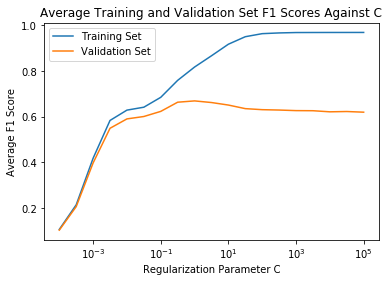

In [55]:
fig = plt.figure()
ax = fig.add_subplot()
ax.plot(C, f1_avgt, label='Training Set')
ax.plot(C, f1_avgv, label='Validation Set')
ax.set_xscale('log')
plt.legend()
plt.xlabel('Regularization Parameter C')
plt.ylabel('Average F1 Score')
plt.title('Average Training and Validation Set F1 Scores Against C')
plt.show()

### 3.6
The optimal value of $C$ is $1$. This value was chosen as it gives rise to the highest average $\mathrm{F1}$ Score on the validation set. As per the SKlearn documentation, $C$ is the inverse regularization parameter defined as $C=\frac{1}{\lambda}$, where $\lambda$ is the lambda regulator. The effect of changing the value of $C$ can be seen in the plot above, where regularizing too little causes the convergence parameters to not be acertained and therefore leads to a low average $\mathrm{F1}$ Score for the training and validation set, while regularizing too much leads to overfitting of the training data, leading to a higher average $\mathrm{F1}$ Score for the training set while lowering the $\mathrm{F1}$ Score for new data.

In [61]:
lr = LogisticRegression(solver="lbfgs", multi_class="multinomial", random_state=0, C=1, max_iter=200)
lr.fit(X_train, y_train)
f1 = f1_score(y_test, lr.predict(X_test), average="macro")
print('Score of best model on testing set: {:.3f}'.format(f1))

Score of best model on testing set: 0.675


### 3.7
The $\mathrm{F1}$ Score for the best model, logistic regression classifier with regularization parameter $C=1$, on the test set is: $0.675$. This result is significantly larger compared to the baseline classifier, and is a decently large $\mathrm{F1}$ Score itself, which indicates that it is classifying the test set well.

# Question 4

In [2]:
data_path4 = os.path.join(os.getcwd(), 'Data/PartB', 'BristolAir_Exploratory.csv')
BA_ex = pd.read_csv(data_path4, delimiter = ',', compression='bz2')

In [3]:
BA_ex

,Date Time,NOx,NO2,NO,SiteID,Loc.Lat,Loc.Long
0,2007-03-27 13:00:00+00:00,87.000000,28.000000,28.750000,1,51.441747,-2.559956
1,2007-03-27 14:00:00+00:00,98.500000,32.000000,32.500000,1,51.441747,-2.559956
2,2007-03-27 20:00:00+00:00,202.000000,97.750000,68.000000,6,51.427864,-2.563742
3,2007-03-28 02:00:00+00:00,107.800000,39.520000,44.520000,8,51.489993,-2.688779
4,2007-03-28 04:00:00+00:00,115.780000,31.940000,54.670000,8,51.489993,-2.688779
5,2007-03-28 07:00:00+00:00,410.500000,49.500000,218.250000,1,51.441747,-2.559956
6,2007-03-28 08:00:00+00:00,295.480000,53.350000,157.870000,8,51.489993,-2.688779
7,2007-03-28 12:00:00+00:00,129.750000,39.500000,45.500000,1,51.441747,-2.559956
8,2007-03-28 13:00:00+00:00,162.860000,69.530000,60.850000,8,51.489993,-2.688779
9,2007-03-28 13:00:00+00:00,217.750000,86.000000,86.250000,10,51.460674,-2.582253


In [4]:
BA_ex.head()

,Date Time,NOx,NO2,NO,SiteID,Loc.Lat,Loc.Long
0,2007-03-27 13:00:00+00:00,87.00,28.00,28.75,1,51.441747,-2.559956
1,2007-03-27 14:00:00+00:00,98.50,32.00,32.50,1,51.441747,-2.559956
2,2007-03-27 20:00:00+00:00,202.00,97.75,68.00,6,51.427864,-2.563742
3,2007-03-28 02:00:00+00:00,107.80,39.52,44.52,8,51.489993,-2.688779
4,2007-03-28 04:00:00+00:00,115.78,31.94,54.67,8,51.489993,-2.688779


### 4.1
The data set contains 1306757 observations, each corresponting to a reading of 3 pollutants $(\mathrm{NO}_x, \mathrm{NO}_2, \mathrm{NO})$, with values ranging from -31.08 to 2164.25 across all pollutants, at one of 18 sites, labeled from 0 to 17, along with the latitude, ranging from 51.43 to 51.49 degrees, and logitude, ranging from -2.69 to -2.54 degrees, of that site and the date, ranging from the year 2007 to 2019, and time, ranging from 0AM to 12PM in 1 hour intervals, the reading was made. The data has a dimension of 7, however it contains observations with missing values, depicted as $\mathrm{NaN}$, as well as negative values for the pollutant readings. Having pollutant reading with negative values in this dataset is unreasonable as there is no real world interpretation of a negative reading of a pollutant and therefore doesn't have any meaning.

In [5]:
BA_ex.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1306758 entries, 0 to 1306757
Data columns (total 7 columns):
Date Time    1306758 non-null object
NOx          1191220 non-null float64
NO2          1188426 non-null float64
NO           1197536 non-null float64
SiteID       1306758 non-null int64
Loc.Lat      1306758 non-null float64
Loc.Long     1306758 non-null float64
dtypes: float64(5), int64(1), object(1)
memory usage: 69.8+ MB


In [6]:
total = 0
for i in np.arange(18):
    total = total + len(BA_ex[BA_ex['SiteID'] == i])
print(total)
print(BA_ex.shape)

1306758
(1306758, 7)


In [10]:
df = pd.DataFrame(columns=['SiteID', 'Number of Samples', 'Percentage of Problematic Samples'])
table = pd.DataFrame(columns=['SiteID', 'Number of Samples', 'Percentage of Missing Samples', 'Percentage of Negative Samples'])
table

,SiteID,Number of Samples,Percentage of Missing Samples,Percentage of Negative Samples


In [11]:
for i in np.arange(18):
    num = BA_ex['SiteID'].value_counts()[i]
    df.loc[i] = [i, num, len(miss[miss['SiteID'] == i]) / num * 100]
print(df.to_latex())

\begin{tabular}{lrrr}
\toprule
{} &  SiteID &  Number of Samples &  Percentage of Problematic Samples \\
\midrule
0  &     0.0 &             6446.0 &                           1.613404 \\
1  &     1.0 &           163111.0 &                           6.290195 \\
2  &     2.0 &            62990.0 &                           4.348309 \\
3  &     3.0 &            25464.0 &                          77.332705 \\
4  &     4.0 &            74787.0 &                           2.068541 \\
5  &     5.0 &           113952.0 &                           8.828279 \\
6  &     6.0 &           142141.0 &                           7.444017 \\
7  &     7.0 &           115162.0 &                           4.194960 \\
8  &     8.0 &            43824.0 &                          21.056955 \\
9  &     9.0 &            22071.0 &                           5.301074 \\
10 &    10.0 &            96407.0 &                           3.589988 \\
11 &    11.0 &            20693.0 &                           1.904026 \

In [39]:
for i in np.arange(18):
    num = BA_ex['SiteID'].value_counts()[i]
    table.loc[i] = [i, num, len(miss[miss['SiteID'] == i]) / num * 100, len(neg[neg['SiteID'] == i]) / num * 100]
test1 = table.drop('SiteID', axis=1)
test1.index.name = 'SiteID'
test1.T
table1 = test1.T[[0, 1, 2, 3, 4, 5]]
table2 = test1.T[[6, 7, 8, 9, 10, 11]]
table3 = test1.T[[12, 13, 14, 15, 16, 17]]
print(table3.to_latex())

\begin{tabular}{lrrrrrr}
\toprule
SiteID &            12 &            13 &            14 &      15 &             16 &            17 \\
\midrule
Number of Samples              &  45240.000000 &  12423.000000 &  113951.00000 &  2712.0 &  154331.000000 &  91053.000000 \\
Percentage of Missing Samples  &     17.484527 &     51.461000 &      10.53172 &   100.0 &       6.530768 &      6.271073 \\
Percentage of Negative Samples &      0.000000 &      0.016099 &       0.00000 &     0.0 &       0.013607 &      0.002197 \\
\bottomrule
\end{tabular}



In [7]:
len(BA_ex[BA_ex.isnull().any(axis=1) == True])

118872

In [8]:
a = BA_ex[BA_ex['NOx'] < 0].append(BA_ex[BA_ex['NO2'] < 0])
a = a.append(BA_ex[BA_ex['NO'] < 0])
neg = a.drop_duplicates()
miss = BA_ex[BA_ex.isnull().any(axis=1) == True]
print(BA_ex[BA_ex['SiteID'] == 15].to_latex())

\begin{tabular}{llrrrrrr}
\toprule
{} &                  Date Time &  NOx &  NO2 &  NO &  SiteID &   Loc.Lat &  Loc.Long \\
\midrule
12090   &  2019-03-28 23:00:00+00:00 &  NaN &  NaN & NaN &      15 &  51.45795 & -2.583989 \\
12093   &  2019-03-29 11:00:00+00:00 &  NaN &  NaN & NaN &      15 &  51.45795 & -2.583989 \\
12096   &  2019-03-30 14:00:00+00:00 &  NaN &  NaN & NaN &      15 &  51.45795 & -2.583989 \\
12099   &  2019-04-02 20:00:00+00:00 &  NaN &  NaN & NaN &      15 &  51.45795 & -2.583989 \\
12102   &  2019-04-02 21:00:00+00:00 &  NaN &  NaN & NaN &      15 &  51.45795 & -2.583989 \\
12105   &  2019-04-04 06:00:00+00:00 &  NaN &  NaN & NaN &      15 &  51.45795 & -2.583989 \\
12108   &  2019-04-06 14:00:00+00:00 &  NaN &  NaN & NaN &      15 &  51.45795 & -2.583989 \\
12111   &  2019-04-08 02:00:00+00:00 &  NaN &  NaN & NaN &      15 &  51.45795 & -2.583989 \\
12114   &  2019-04-11 08:00:00+00:00 &  NaN &  NaN & NaN &      15 &  51.45795 & -2.583989 \\
12117   &  2019-04-12

In [49]:
miss.head()

,Date Time,NOx,NO2,NO,SiteID,Loc.Lat,Loc.Long
4798,1999-01-10 01:00:00+00:00,-30.89,-3.87,-17.61,3,51.475285,-2.56208
4801,1999-01-10 12:00:00+00:00,-30.36,-3.87,-17.27,3,51.475285,-2.56208
26089,1999-01-10 05:00:00+00:00,-30.79,-3.92,-17.52,3,51.475285,-2.56208
26093,1999-01-11 00:00:00+00:00,-30.84,-4.11,-17.46,3,51.475285,-2.56208
44985,1999-11-09 08:00:00+00:00,-17.40,-3.83,-8.85,3,51.475285,-2.56208


### 4.3
The number of samples belonging to each of the 18 sites varies greatly with the smallest number of samples in site 15, with 2712 samples, and the largest number of samples in site 1, with 163111 samples. All sites contain problematic samples, making up less than 10% of the majority of all sites, however sites 3, 8, 13 and 15 contain significantly more problematic samples, with site 15 being made up of only problematic samples. Out of the 2 types of problematic samples, missing samples occur significantly more than negative samples.

In [4]:
data_315 = BA_ex.loc[(BA_ex['SiteID'] != 3) & (BA_ex['SiteID'] != 15)]

In [8]:
pear = data_315.drop(columns=['Loc.Lat', 'Loc.Long', 'SiteID']).corr(method='pearson')
print(pear.to_latex())

\begin{tabular}{lrrr}
\toprule
{} &       NOx &       NO2 &        NO \\
\midrule
NOx &  1.000000 &  0.878016 &  0.988019 \\
NO2 &  0.878016 &  1.000000 &  0.807853 \\
NO  &  0.988019 &  0.807853 &  1.000000 \\
\bottomrule
\end{tabular}



### 4.5
From the data set, each pollutant seems to have a significant positive correlation with every other pollutant. Out of all the pairs $\mathrm{NO}_x$ and $\mathrm{NO}$ exhibit the strongest positive correlation, while $\mathrm{NO}_x$ and $\mathrm{NO}_2$ exhibit the least strongest positive correlation. This could indicate that all 3 pollutants have a positive correlation with each other.

In [29]:
data_path5 = os.path.join(os.getcwd(), 'Data/PartB', 'BristolAir_SiteAligned.csv')
BA_sa = pd.read_csv(data_path5, delimiter = ',', compression='bz2', header=[0, 1], parse_dates=[0])

In [30]:
BA_sa.head()

Date Time    NOx                                        \
         Unnamed: 0_level_1      1       2       4       6     7      10   
0 2009-03-14 04:00:00+00:00  10.50   15.25   21.50   23.75   8.0   53.25   
1 2009-03-14 05:00:00+00:00   9.75    9.50   11.50   23.25  10.0   30.50   
2 2009-03-15 17:00:00+00:00  67.25   88.75   66.00  163.75  36.0  203.75   
3 2009-03-17 13:00:00+00:00  71.75  124.50  135.00   96.50  38.0  172.50   
4 2009-03-17 15:00:00+00:00  82.00  125.00  104.25  106.50  36.0  193.00   

                         ...     NO                                          \
      12      14     16  ...      1      2      4      6    7     10     12   
0   19.0  201.75   40.0  ...   2.75   2.25   4.00   8.75  0.0  12.50    3.0   
1   19.0  138.00   42.0  ...   3.00   2.75   3.00   8.50  0.0   5.75    3.0   
2  155.0  429.00   94.0  ...  18.25  27.00  16.50  57.25  3.0  69.75   51.0   
3  338.0  734.00  196.5  ...  17.75  53.25  46.25  34.75  6.0  61.50  139.0   
4  321.0  679.00  329.0  ...  21.50  47.50  34.25  36.50  5.0  63.75  130.0   

                          
       14      16     17  
0   64.75   12.50   2.50  
1   38.50   12.25   2.25  
2  177.00   21.50  28.50  
3  345.50   71.00  47.00  
4  305.25  134.25  45.50  

[5 rows x 31 columns]

In [31]:
group1 = BA_sa.drop(columns='Date Time').groupby(level=0, axis=1).get_group('NOx').corr(method='pearson')
group1 = group1.droplevel(level=0, axis=1).droplevel(level=0, axis=0)
group2 = BA_sa.drop(columns='Date Time').groupby(level=0, axis=1).get_group('NO2').corr(method='pearson')
group2 = group2.droplevel(level=0, axis=1).droplevel(level=0, axis=0)
group3 = BA_sa.drop(columns='Date Time').groupby(level=0, axis=1).get_group('NO').corr(method='pearson')
group3 = group3.droplevel(level=0, axis=1).droplevel(level=0, axis=0)

C:\Users\DAVID\Anaconda3\envs\iaml\lib\site-packages\pandas\core\generic.py:3947: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  new_axis = axis.drop(labels, errors=errors)


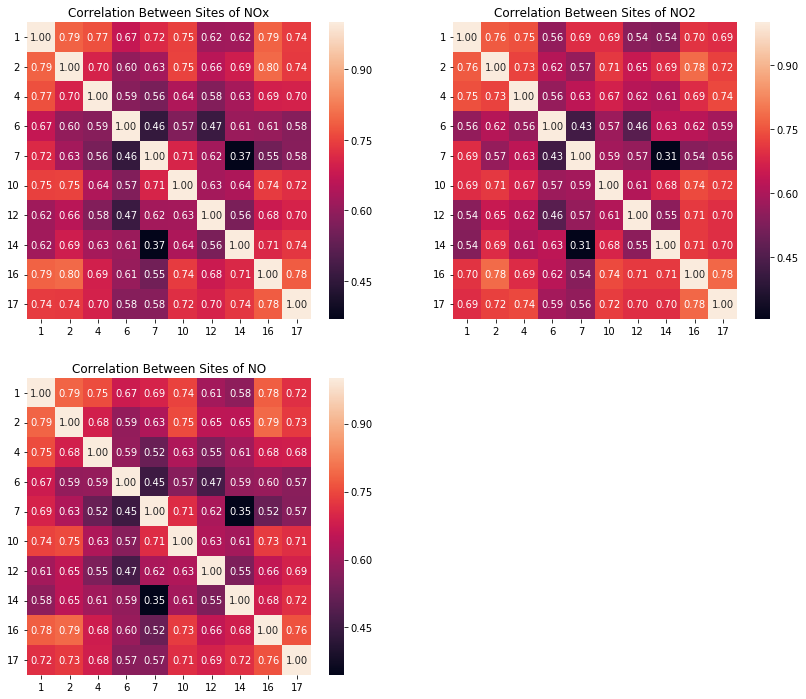

In [46]:
fig, axes = plt.subplots(2, 2, figsize=(14,12))
plot_matrix(group1.to_numpy(), show_val=True, mode='heatmap', labels=[1, 2, 4, 6, 7, 10, 12, 14, 16, 17], ax=axes[0][0])
plot_matrix(group2.to_numpy(), show_val=True, mode='heatmap', labels=[1, 2, 4, 6, 7, 10, 12, 14, 16, 17], ax=axes[0][1])
plot_matrix(group3.to_numpy(), show_val=True, mode='heatmap', labels=[1, 2, 4, 6, 7, 10, 12, 14, 16, 17], ax=axes[1][0])
axes[0][0].set_title("Correlation Between Sites of NOx")
axes[0][1].set_title("Correlation Between Sites of NO2")
axes[1][0].set_title("Correlation Between Sites of NO")
fig.delaxes(axes[1][1])
plt.show()

### 4.7
As seen from the heatmap plot for $\mathrm{NO}$ from the last question the pearson correlation coefficient between each pair of sites are all greater than 0, meaning that they all exhibit positive correlation. Some sites, however, show a much weaker positive correlation when paired with all the other sites, particularly sites 6, 7, 12 and 14, with the smallest correlation coefficient arising from the pair 14 and 7. The other 2 heatmaps show similar patterns, however in the heatmap for $\mathrm{NO}_2$, the correlation between sites 10 and 7 is much lower compared to the other two plots.

# Question 5

In [30]:
data_path5 = os.path.join(os.getcwd(), 'Data/PartB', 'BristolAir_DayAligned.csv')
BA_da = pd.read_csv(data_path5, delimiter = ',', compression='bz2', index_col=['SiteID', 'Date'])

In [31]:
BA_da.head()

0      1     2      3       4       5       6       7  \
SiteID Date                                                                    
1      2004-07-02  25.25  18.00  12.5   9.25    8.75   14.50   18.50   30.75   
       2004-07-03  22.25  21.00  23.5  33.75   15.50    9.00   14.00   57.75   
       2004-07-04  28.25  22.25  32.0  34.50   50.50   76.50  165.75  170.00   
       2004-07-05  56.75  62.50  79.5  78.50  115.75  149.00  175.00  119.00   
       2004-07-06  94.25  68.25  44.5  47.67   31.75   28.25   31.75   55.75   

                       8      9  ...     62     63    64     65     66     67  \
SiteID Date                      ...                                            
1      2004-07-02  35.25  39.00  ...  14.25  13.75  12.0  12.50  10.75  10.50   
       2004-07-03  49.75  49.75  ...  12.00  10.25  11.0  14.75  12.50  11.50   
       2004-07-04  63.25  57.75  ...  19.25  29.75  17.5  26.50  18.25  18.75   
       2004-07-05  83.75  94.75  ...  19.25  23.50  12.0  15.50  12.50  13.50   
       2004-07-06  41.00  37.75  ...   3.25   2.25   3.0   2.00   2.00   1.00   

                      68     69     70     71  
SiteID Date                                    
1      2004-07-02   9.25   9.00   7.75  10.75  
       2004-07-03   5.75   8.25   6.25   1.25  
       2004-07-04  12.50  14.00  20.75  26.00  
       2004-07-05  17.75  38.00  39.25  21.50  
       2004-07-06   0.75   0.75   1.00   0.25  

[5 rows x 72 columns]

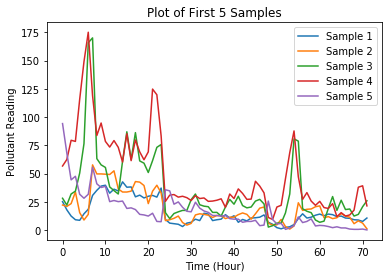

In [33]:
for i in np.arange(5):
    nox = BA_da.iloc[i].to_numpy()
    plt.plot(np.arange(72), nox)

plt.legend(['Sample 1', 'Sample 2', 'Sample 3', 'Sample 4', 'Sample 5'])
plt.xlabel('Time (Hour)')
plt.ylabel('Pollutant Reading')
plt.title('Plot of First 5 Samples')
plt.show()

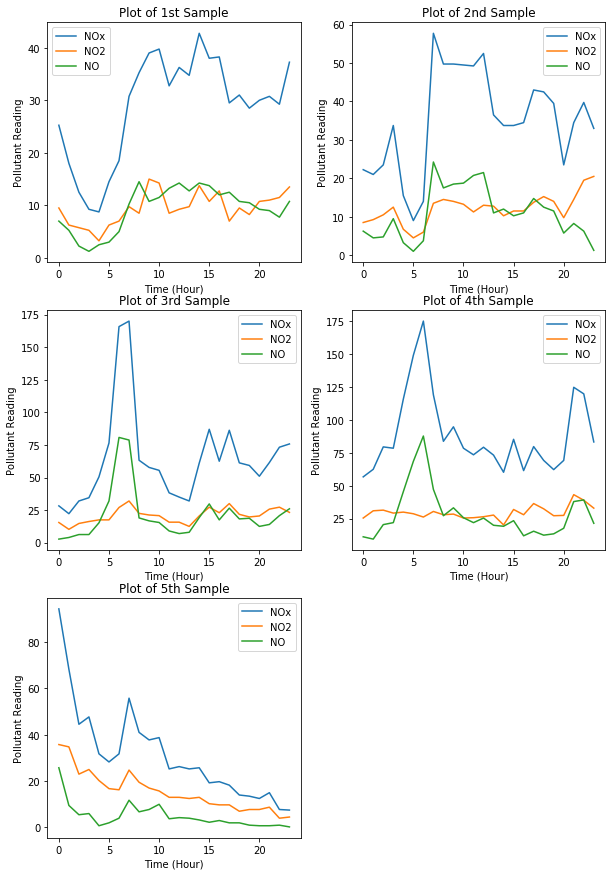

In [47]:
fig, ax = plt.subplots(3,2, figsize=(10,15))
nox = BA_da.iloc[0][0:24].to_numpy()
no2 = BA_da.iloc[0][24:48].to_numpy()
no = BA_da.iloc[0][48:72].to_numpy()
ax[0][0].plot(np.arange(24), nox)
ax[0][0].plot(np.arange(24), no2)
ax[0][0].plot(np.arange(24), no)
ax[0][0].legend(['NOx', 'NO2', 'NO'])
ax[0][0].set_xlabel('Time (Hour)')
ax[0][0].set_ylabel('Pollutant Reading')
ax[0][0].set_title('Plot of 1st Sample')

nox = BA_da.iloc[1][0:24].to_numpy()
no2 = BA_da.iloc[1][24:48].to_numpy()
no = BA_da.iloc[1][48:72].to_numpy()
ax[0][1].plot(np.arange(24), nox)
ax[0][1].plot(np.arange(24), no2)
ax[0][1].plot(np.arange(24), no)
ax[0][1].legend(['NOx', 'NO2', 'NO'])
ax[0][1].set_xlabel('Time (Hour)')
ax[0][1].set_ylabel('Pollutant Reading')
ax[0][1].set_title('Plot of 2nd Sample')

nox = BA_da.iloc[2][0:24].to_numpy()
no2 = BA_da.iloc[2][24:48].to_numpy()
no = BA_da.iloc[2][48:72].to_numpy()
ax[1][0].plot(np.arange(24), nox)
ax[1][0].plot(np.arange(24), no2)
ax[1][0].plot(np.arange(24), no)
ax[1][0].legend(['NOx', 'NO2', 'NO'])
ax[1][0].set_xlabel('Time (Hour)')
ax[1][0].set_ylabel('Pollutant Reading')
ax[1][0].set_title('Plot of 3rd Sample')

nox = BA_da.iloc[3][0:24].to_numpy()
no2 = BA_da.iloc[3][24:48].to_numpy()
no = BA_da.iloc[3][48:72].to_numpy()
ax[1][1].plot(np.arange(24), nox)
ax[1][1].plot(np.arange(24), no2)
ax[1][1].plot(np.arange(24), no)
ax[1][1].legend(['NOx', 'NO2', 'NO'])
ax[1][1].set_xlabel('Time (Hour)')
ax[1][1].set_ylabel('Pollutant Reading')
ax[1][1].set_title('Plot of 4th Sample')

nox = BA_da.iloc[4][0:24].to_numpy()
no2 = BA_da.iloc[4][24:48].to_numpy()
no = BA_da.iloc[4][48:72].to_numpy()
ax[2][0].plot(np.arange(24), nox)
ax[2][0].plot(np.arange(24), no2)
ax[2][0].plot(np.arange(24), no)
ax[2][0].legend(['NOx', 'NO2', 'NO'])
ax[2][0].set_xlabel('Time (Hour)')
ax[2][0].set_ylabel('Pollutant Reading')
ax[2][0].set_title('Plot of 5th Sample')

fig.delaxes(ax[2][1])
plt.show()

In [26]:
BA_da.head()

0      1     2      3       4       5       6       7  \
SiteID Date                                                                    
1      2004-07-02  25.25  18.00  12.5   9.25    8.75   14.50   18.50   30.75   
       2004-07-03  22.25  21.00  23.5  33.75   15.50    9.00   14.00   57.75   
       2004-07-04  28.25  22.25  32.0  34.50   50.50   76.50  165.75  170.00   
       2004-07-05  56.75  62.50  79.5  78.50  115.75  149.00  175.00  119.00   
       2004-07-06  94.25  68.25  44.5  47.67   31.75   28.25   31.75   55.75   

                       8      9  ...     62     63    64     65     66     67  \
SiteID Date                      ...                                            
1      2004-07-02  35.25  39.00  ...  14.25  13.75  12.0  12.50  10.75  10.50   
       2004-07-03  49.75  49.75  ...  12.00  10.25  11.0  14.75  12.50  11.50   
       2004-07-04  63.25  57.75  ...  19.25  29.75  17.5  26.50  18.25  18.75   
       2004-07-05  83.75  94.75  ...  19.25  23.50  12.0  15.50  12.50  13.50   
       2004-07-06  41.00  37.75  ...   3.25   2.25   3.0   2.00   2.00   1.00   

                      68     69     70     71  
SiteID Date                                    
1      2004-07-02   9.25   9.00   7.75  10.75  
       2004-07-03   5.75   8.25   6.25   1.25  
       2004-07-04  12.50  14.00  20.75  26.00  
       2004-07-05  17.75  38.00  39.25  21.50  
       2004-07-06   0.75   0.75   1.00   0.25  

[5 rows x 72 columns]

In [36]:
site1 = BA_da[BA_da.index.get_level_values(0) == 1]
np.cumsum(pca.explained_variance_ratio_)

array([0.58900596, 0.72722179, 0.79409131, 0.84625699, 0.8853502 ,
       0.90585433, 0.9201634 , 0.93238651, 0.94223464, 0.94976523,
       0.95646117, 0.9620975 , 0.96645848, 0.97056908, 0.97396026,
       0.97674456, 0.97922803, 0.98149213, 0.98373034, 0.98571006,
       0.98757322, 0.98936403, 0.99094829, 0.99222474, 0.9934267 ,
       0.99451716, 0.99551051, 0.99632472, 0.99691798, 0.99749834,
       0.99798769, 0.9982737 , 0.99853736, 0.99872223, 0.99887998,
       0.99901181, 0.99911673, 0.99921638, 0.999296  , 0.99937332,
       0.99944269, 0.99950428, 0.99956205, 0.9996179 , 0.99967195,
       0.99971944, 0.99976566, 0.9998091 , 0.99984913, 0.99988626,
       0.99991856, 0.99994037, 0.9999533 , 0.9999643 , 0.99996957,
       0.99997434, 0.99997803, 0.999981  , 0.99998339, 0.99998548,
       0.99998737, 0.99998905, 0.99999053, 0.99999192, 0.99999323,
       0.99999442, 0.99999556, 0.99999663, 0.99999764, 0.99999862,
       0.9999994 , 1.        ])

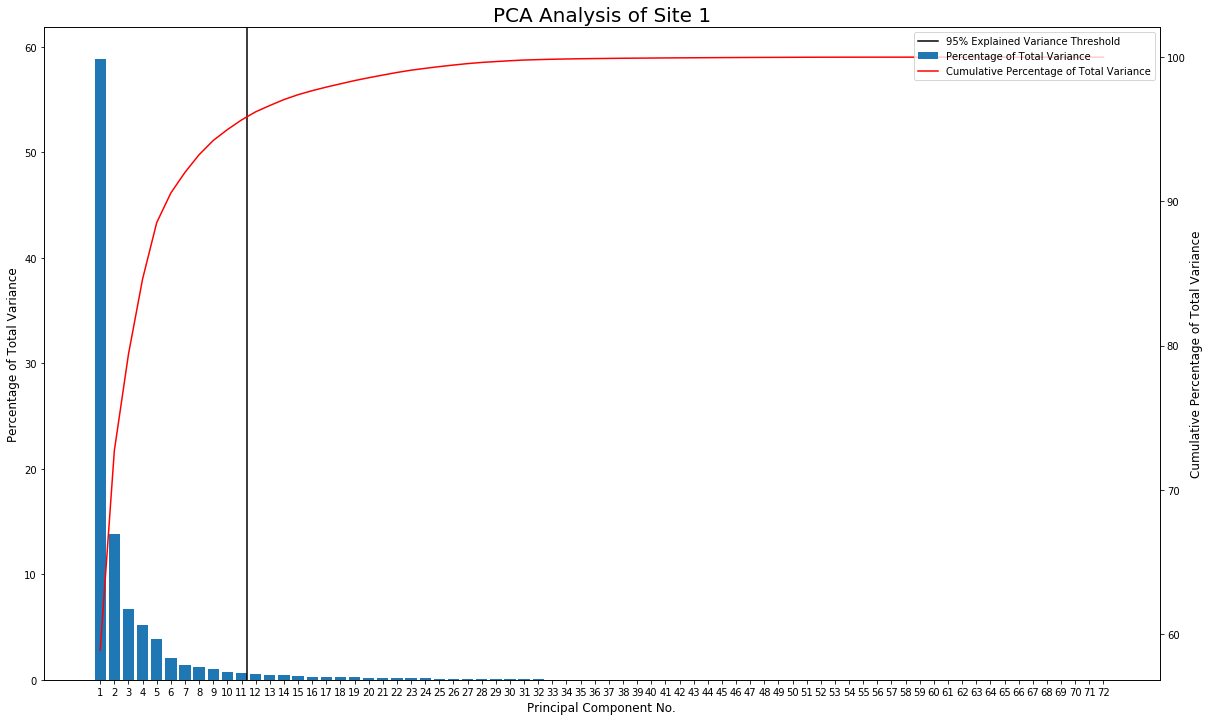

In [39]:
pca = PCA(n_components=72, random_state=72)
pca.fit(site1)
fig, ax1 = plt.subplots()
fig.set_figheight(12)
fig.set_figwidth(20)
lns1 = ax1.bar(np.arange(1,73), height=pca.explained_variance_ratio_*100, align='center', width=0.8, label='Percentage of Total Variance')
ax1.set_ylabel('Percentage of Total Variance', fontsize=12)
ax1.set_xlabel('Principal Component No.', fontsize=12)
ax2 = ax1.twinx()
lns2 = ax2.plot(np.arange(1,73), np.cumsum(pca.explained_variance_ratio_*100), color='red', label = 'Cumulative Percentage of Total Variance')
plt.ylabel('Cumulative Percentage of Total Variance', fontsize=12)
plt.xticks(np.arange(1,73), fontsize=7)
lns3 = ax1.axvline(x=11.4, color='black', label='95% Explained Variance Threshold')

lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines+lines2, labels+labels2, loc='upper right')
plt.title("PCA Analysis of Site 1", fontsize=20)
plt.show()

### 5.3
As seen from the vertical bars in the plot from the previous question, the first principal component explains more of the total variance than all of the other components combined, thus only 11 principal components are needed to explain 95% of the total variance. The red line shows the cumulative variance over all 72 principal components, with the cumulative sum being the variance of the original data.

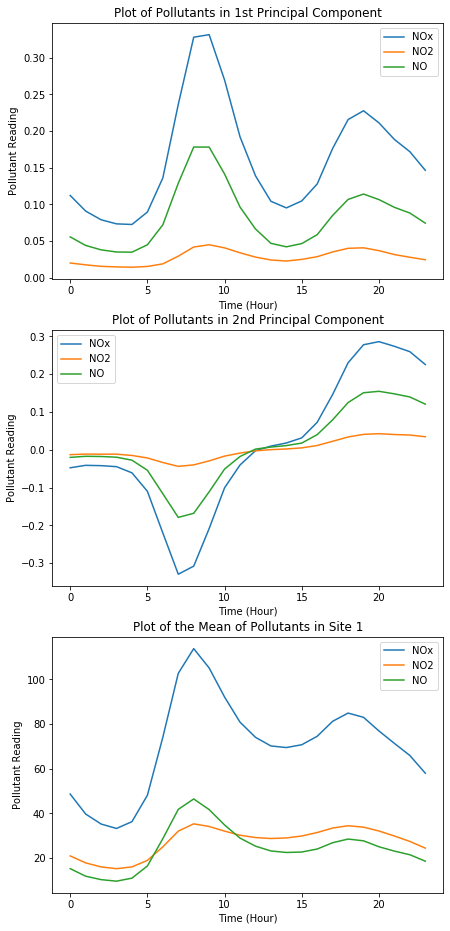

In [72]:
pca1 = pca.components_[0]
pca2 = pca.components_[1]
mean = site1.mean()

fig, ax = plt.subplots(3,1, figsize=(7,16))

nox = pca1[0:24]
no2 = pca1[24:48]
no = pca1[48:72]
ax[0].plot(np.arange(24), nox)
ax[0].plot(np.arange(24), no2)
ax[0].plot(np.arange(24), no)
ax[0].legend(['NOx', 'NO2', 'NO'])
ax[0].set_xlabel('Time (Hour)')
ax[0].set_ylabel('Pollutant Reading')
ax[0].set_title('Plot of Pollutants in 1st Principal Component')

nox = pca2[0:24]
no2 = pca2[24:48]
no = pca2[48:72]
ax[1].plot(np.arange(24), nox)
ax[1].plot(np.arange(24), no2)
ax[1].plot(np.arange(24), no)
ax[1].legend(['NOx', 'NO2', 'NO'])
ax[1].set_xlabel('Time (Hour)')
ax[1].set_ylabel('Pollutant Reading')
ax[1].set_title('Plot of Pollutants in 2nd Principal Component')

nox = mean[0:24]
no2 = mean[24:48]
no = mean[48:72]
ax[2].plot(np.arange(24), nox)
ax[2].plot(np.arange(24), no2)
ax[2].plot(np.arange(24), no)
ax[2].legend(['NOx', 'NO2', 'NO'])
ax[2].set_xlabel('Time (Hour)')
ax[2].set_ylabel('Pollutant Reading')
ax[2].set_title('Plot of the Mean of Pollutants in Site 1')

plt.show()

### 5.5
Comparing the plot of the mean and the 1st principal component, a pattern can be seen on the amount of pollutants throughout the day, namely pollutant readings increase significantly around 9AM before decreasing, and then increase significantly again around 7PM, before decreasing again. This could be due to pollution from cars, as there is an increase in use during rush hours. The issue with comparing the mean and the 1st principal component, is that the values in the mean correspond to pollutant readings, whilst in the 1st principal component they corresponds to the direction of greatest variance in the feature space of site 1, thus they don't correspond to the same thing. There are no significant differences between pollutants when comparing the the first 2 principal components, this could be due to the fact that PCA is scale variant and thus is affected by the scale of the data. This can be solved by normalizing the data beforehand, however this was not done.

# Question 6

In [2]:
data_path5 = os.path.join(os.getcwd(), 'Data/PartB', 'BristolAir_SiteAligned.csv')
BA_sa = pd.read_csv(data_path5, delimiter = ',', compression='bz2', header=[0, 1], parse_dates=[0])

In [3]:
BA_sa.head()

Date Time    NOx                                        \
         Unnamed: 0_level_1      1       2       4       6     7      10   
0 2009-03-14 04:00:00+00:00  10.50   15.25   21.50   23.75   8.0   53.25   
1 2009-03-14 05:00:00+00:00   9.75    9.50   11.50   23.25  10.0   30.50   
2 2009-03-15 17:00:00+00:00  67.25   88.75   66.00  163.75  36.0  203.75   
3 2009-03-17 13:00:00+00:00  71.75  124.50  135.00   96.50  38.0  172.50   
4 2009-03-17 15:00:00+00:00  82.00  125.00  104.25  106.50  36.0  193.00   

                         ...     NO                                          \
      12      14     16  ...      1      2      4      6    7     10     12   
0   19.0  201.75   40.0  ...   2.75   2.25   4.00   8.75  0.0  12.50    3.0   
1   19.0  138.00   42.0  ...   3.00   2.75   3.00   8.50  0.0   5.75    3.0   
2  155.0  429.00   94.0  ...  18.25  27.00  16.50  57.25  3.0  69.75   51.0   
3  338.0  734.00  196.5  ...  17.75  53.25  46.25  34.75  6.0  61.50  139.0   
4  321.0  679.00  329.0  ...  21.50  47.50  34.25  36.50  5.0  63.75  130.0   

                          
       14      16     17  
0   64.75   12.50   2.50  
1   38.50   12.25   2.25  
2  177.00   21.50  28.50  
3  345.50   71.00  47.00  
4  305.25  134.25  45.50  

[5 rows x 31 columns]

In [4]:
NOx = BA_sa.groupby(axis=1, level=0).get_group('NOx')
X = NOx.drop(columns='17', level=1)
y = NOx['NOx']['17']

In [5]:
idx = multi_way_split(y, [0.6, 0.15, 0.25], splitter=ShuffleSplit, random_state=0)
X_train, X_val, X_test = X.iloc[idx[0]], X.iloc[idx[1]], X.iloc[idx[2]]
print("Size of training set : {}\nSize of validation set : {}\nSize of testing set : {}".format(X_train.shape, X_val.shape, X_test.shape))

Size of training set : (8937, 9)
Size of validation set : (2234, 9)
Size of testing set : (3724, 9)


In [6]:
y.iloc[idx[0]]

8550     402.75
5582      69.75
3153      44.75
10322    441.75
13556     15.50
          ...  
13123     77.75
3264     140.50
9845     156.75
10799     71.50
2732      56.75
Name: 17, Length: 8937, dtype: float64

In [7]:
baseline_predict = y.mean()
print("RMSE of training set : {:.3f}".format(np.sqrt(mean_squared_error(y.iloc[idx[0]], np.full_like(y.iloc[idx[0]], baseline_predict)))))
print("RMSE of validation set : {:.3f}".format(np.sqrt(mean_squared_error(y.iloc[idx[1]], np.full_like(y.iloc[idx[1]], baseline_predict)))))

RMSE of training set : 79.714
RMSE of validation set : 80.211


### 6.2
The baseline regressor will use the $y$-values to select the average value for site 17 to use as its prediction. This is done by taking the mean of the $y$-values and using it as the predicted value for the training and validation set. $\mathrm{RMSE}$ of the training set: 79.714, $\mathrm{RMSE}$ of the validation set: 80.211. The values gives us the standard deviation of the residuals, which are the prediction errors, and in this case there is a large standard deviation for both data sets indicating a poor performance.

In [8]:
lr = LinearRegression()
lr.fit(X_train, y.iloc[idx[0]])
print("RMSE of training set : {}".format(np.sqrt(mean_squared_error(y.iloc[idx[0]], lr.predict(X_train)))))
print("RMSE of validation set : {}".format(np.sqrt(mean_squared_error(y.iloc[idx[1]], lr.predict(X_val)))))
print("Performance of training set : {:.3f}".format(lr.score(X_train, y.iloc[idx[0]])))
print("Performance of validation set : {:.3f}".format(lr.score(X_val, y.iloc[idx[1]])))

RMSE of training set : 39.83472027954455
RMSE of validation set : 41.12740349422
Performance of training set : 0.750
Performance of validation set : 0.737


### 6.3
$\mathrm{RMSE}$ of the training set: 39.835, $\mathrm{RMSE}$ of the validation set: 41.127. When compared to the baseline regressor it can be seen that the $\mathrm{RMSE}$ values for the linear regression algorithm are almost half of those reported by the baseline predictor for both data sets, indicating a smaller standard deviation of the residuals and thus a much better performance when the linear regression algorithm is used. 

### 6.4
The magnitude of the coefficients indicates how a change in the independent variables affects the target variable. Thus it depends on their magnitudes, and if they are not of the same scale comparison is meaningless. To make comparisons meaningful normalization is used to get a uniform scale of the data. By the SKLearn documentation, the input data is normalized by subtracting the mean and dividing by the $\mathrm{L2}$-$norm$, which allows for the features to be comapared by looking at the coeffiecients. Normalizing has no effect on the performance of the linear regressor.

In [11]:
lr = LinearRegression(normalize=True)
lr.fit(X_train, y.iloc[idx[0]])

params = lr.coef_

index = pd.MultiIndex.from_product([X.droplevel(level=0, axis=1).columns], names=['Site'])
params = pd.DataFrame({'Coefficient': lr.coef_}, index = index)
print(params.T.to_latex())

\begin{tabular}{lrrrrrrrrr}
\toprule
Site &         1 &         2 &         4 &         6 &         7 &        10 &       12 &        14 &        16 \\
\midrule
Coefficient &  0.115556 &  0.009947 &  0.134139 & -0.006799 &  0.059388 &  0.079779 &  0.12911 &  0.094507 &  0.161828 \\
\bottomrule
\end{tabular}



### 6.5
As seen from the table above, the feature with the greatest relative importance is site 16 as it has the largest ratio of the total magnitude while site 6 has the smallest ratio and thus has the least importance. When compared with the correlation coefficients for Site 17, it can be seen that the greater the relative importance of that site, the greater its correlation coefficient relative to the others. This is observed due to the fact that linear regression attempts to create a linear model of the independent variables against the target variable, thus if there is a stronger positive correlation between a feaure and the target variable, then it will have a greater weight on the linear regression model as there is a stronger linear relationship.

In [10]:
kNN = KNeighborsRegressor(n_jobs=-1)
kNN.fit(X_train, y.iloc[idx[0]])
print("RMSE of training set : {:.3f}".format(np.sqrt(mean_squared_error(y.iloc[idx[0]], kNN.predict(X_train)))))
print("RMSE of validation set : {:.3f}".format(np.sqrt(mean_squared_error(y.iloc[idx[1]], kNN.predict(X_val)))))
print("Training Set Performance : {}".format(kNN.score(X_train, y.iloc[idx[0]])))
print("Validation Set Performance : {}".format(kNN.score(X_val, y.iloc[idx[1]])))

RMSE of training set : 32.436
RMSE of validation set : 40.307
Training Set Performance : 0.8344230451139573
Validation Set Performance : 0.7473457720103046


### 6.6
$\mathrm{RMSE}$ of the training set: 32.436, $\mathrm{RMSE}$ of the validation set: 40.307. When compared to the linear regression performance it can be seen that the KNN regressor performs marginally better on both sets as it outputs lower $\mathrm{RMSE}$ values. One of the limitations of the KNN algorithm to the data set is that it can't deal with missing data or outliers such as the negative pollutant readings.

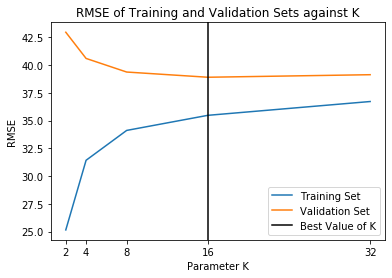

[42.95551269008171, 40.595609577419665, 39.37125304834977, 38.901851355962386, 39.13083888473987]


In [15]:
RMSE_T = []
RMSE_V = []
for i in [2, 4, 8, 16, 32]:
    kNN = KNeighborsRegressor(n_neighbors=i, n_jobs=-1)
    kNN.fit(X_train, y.iloc[idx[0]])
    RMSE_T.append(np.sqrt(mean_squared_error(y.iloc[idx[0]], kNN.predict(X_train))))
    RMSE_V.append(np.sqrt(mean_squared_error(y.iloc[idx[1]], kNN.predict(X_val))))

fig, ax = plt.subplots()
ax.plot([2, 4, 8, 16, 32], RMSE_T)
ax.plot([2, 4, 8, 16, 32], RMSE_V)
ax.axvline(x=16, color='black')
ax.set_xlabel('Parameter K')
ax.set_ylabel('RMSE')
plt.title('RMSE of Training and Validation Sets against K')
ax.legend(['Training Set', 'Validation Set', 'Best Value of K'])
ax.set_xticks([2, 4, 8, 16, 32])

plt.show()
print(RMSE_V)

### 6.8
The best case performance on the validation set is when $K=16$, with an $\mathrm{RMSE}$ value of 38.902.

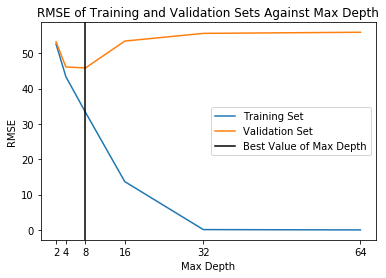

[53.25095179219833, 46.12769116861275, 45.84380928287788, 53.4486396323909, 55.62441997967441, 55.9470657647145]


In [99]:
RMSE_T = []
RMSE_V = []
for i in [2, 4, 8, 16, 32, 64]:
    dtr = DecisionTreeRegressor(max_depth=i, random_state=0)
    dtr.fit(X_train, y.iloc[idx[0]])
    RMSE_T.append(np.sqrt(mean_squared_error(y.iloc[idx[0]], dtr.predict(X_train))))
    RMSE_V.append(np.sqrt(mean_squared_error(y.iloc[idx[1]], dtr.predict(X_val))))

fig, ax = plt.subplots()
ax.plot([2, 4, 8, 16, 32, 64], RMSE_T)
ax.plot([2, 4, 8, 16, 32, 64], RMSE_V)
ax.axvline(x=8, color='black')
ax.set_xlabel('Max Depth')
ax.set_ylabel('RMSE')
plt.title('RMSE of Training and Validation Sets Against Max Depth')
ax.legend(['Training Set', 'Validation Set', 'Best Value of Max Depth'])
ax.set_xticks([2, 4, 8, 16, 32, 64])
plt.show()
print(RMSE_V)

### 6.10
The best case performance on the validation set is when $\mathrm{max\_depth}=8$, with an $\mathrm{RMSE}$ value of 45.844. As the max depth increases the decision tree model starts to overfit to the training data more and more. This causes poor predictions on unseen data, which can be seen from the $\mathrm{RMSE}$ value of the validation set increasing.

In [100]:
X = X_train.append(X_val)
y_train = y.iloc[idx[0]].append(y.iloc[idx[1]])
#baseline
RMSE = []
RMSE.append(np.sqrt(mean_squared_error(y.iloc[idx[2]], np.full_like(y.iloc[idx[2]], baseline_predict))))
#linear regression
lr = LinearRegression()
lr.fit(X, y_train)
RMSE.append(np.sqrt(mean_squared_error(y.iloc[idx[2]], lr.predict(X_test))))
#kNN
kNN = KNeighborsRegressor(n_neighbors=16, n_jobs=-1)
kNN.fit(X, y_train)
RMSE.append(np.sqrt(mean_squared_error(y.iloc[idx[2]], kNN.predict(X_test))))
#Decision Tree
dtr = DecisionTreeRegressor(max_depth=8, random_state=0)
dtr.fit(X, y_train)
RMSE.append(np.sqrt(mean_squared_error(y.iloc[idx[2]], dtr.predict(X_test))))
table = pd.DataFrame({'RMSE of Testing Set' : RMSE}, index=['Baseline Regressor', 'Linear Regression', 'KNN Regression', 'Decision Tree Regressor'])
print(table.T.to_latex())

\begin{tabular}{lrrrr}
\toprule
{} &  Baseline Regressor &  Linear Regression &  KNN Regression &  Decision Tree Regressor \\
\midrule
RMSE of Testing Set &           78.937312 &          40.509027 &       37.984965 &                43.068871 \\
\bottomrule
\end{tabular}

